## Dataset used : MBA Salary.csv

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('MBA Salary.csv')

In [4]:
df.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [7]:
X = sm.add_constant(df['Percentage in Grade 10'])
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [9]:
Y = df['Salary']
Y.head(5)

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size = 0.8, random_state = 100)

In [12]:
salary_lm = sm.OLS (train_Y, train_X).fit()

In [15]:
print (salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [16]:
salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2021-08-30 18:52      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 576x432 with 0 Axes>

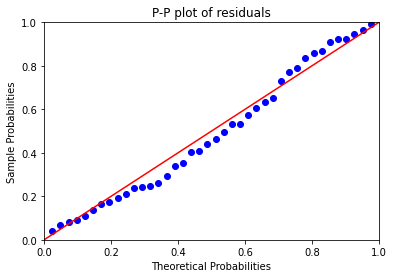

In [19]:
salary_resid = salary_lm.resid
probplot = sm.ProbPlot(salary_resid)
plt.figure (figsize = (8,6))
probplot.ppplot (line = '45')
plt.title ('P-P plot of residuals')
plt.show()

In [20]:
pred_Y = salary_lm.predict(test_X)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
np.abs (r2_score(test_Y, pred_Y))

0.156645849742304

In [23]:
np.sqrt (mean_squared_error(test_Y, pred_Y))

73458.04348346895

In [24]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

pred_Y = salary_lm.predict(test_X)

In [29]:
_ , pred_y_low, pred_y_high = wls_prediction_std (salary_lm, test_X , alpha = 0.1)
pred_y_df = pd.DataFrame ({'grade_10_perc': test_X['Percentage in Grade 10'], 
                           'pred_Y' : pred_Y, 
                           'pred_Y_left' : pred_y_low, 
                           'pred_Y_right' : pred_y_high})

In [30]:
pred_y_df.head()

,grade_10_perc,pred_Y,pred_Y_left,pred_Y_right
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008


#Multiple Regression
## Dataset used : IPL Dataset

In [32]:
df = pd.read_csv ('IPL IMB381IPL2013.csv')
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
